## PROBLEM STATEMENT: 

### Can we help real estate agents in the city of Ames, Iowa predict the sale price of a house based on housing and real estate data using key predictors to create an accessible predictive Regression-based model?

The short answer is yes, and we start with cleaning the data first. We will then move on to EDA, before preprocessing, modelling and evaluating performance with concluding remarks.

## 1. Cleaning Train and Test Datasets

In [1]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read csv file
train=pd.read_csv('./datasets/train.csv')

test=pd.read_csv('./datasets/test.csv')

sample = pd.read_csv('./datasets/sample_sub_reg.csv')

In [3]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
test.shape

(879, 80)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
train.shape

#this is a pretty huge dataset; 2015 entries x 81 columns

(2051, 81)

In [8]:
#Lots of null values. let's deep dive next cell

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
#based on this we see quite a lot of missing values. There are also 38 integer/float columns, and 43 categorical columns

In [10]:
#easy thing is drop the ID column in both

train.drop(columns=['Id'], axis = 1, inplace = True)
test.drop(columns=['Id'], axis=1, inplace=True)

In [11]:
#we should change column types that look incorrectly labeled as integer/float columns into categories, 
#based on data dictionary e.g. 
#helps for future one-hot encoding in Feature Engineering/Preprocessing; will create a function 

features_changelist= ['MS SubClass', 'Overall Qual', 'Overall Cond', "Garage Cars"]


#so that we can do this for Test.csv cleaning too
for feat in features_changelist:
    train[feat] = train[feat].astype(object)
    test[feat] = test[feat].astype(object)


In [12]:
train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [13]:
#For Train Data, seems the largest number of NaNs are in Pool QC, Misc Feature, Alley, Fence, Fireplace Qu and Lot Frontage
#Followed by the Garage sub-features

train.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
dtype: int64

In [14]:
#Similar Nan problems found in test.

test.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 2     25
Mas Vnr Area        1
Electrical          1
Mas Vnr Type        1
Year Built          0
dtype: int64

In [15]:
#lets check out the top 4 worst columns value counts 
#starting with the highest missing values: Pool QC, Misc Feature, Alley and Fence

train['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [16]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [17]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [18]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [19]:
#there's really not much to work with at all, so I'm going to drop all 4 columns in both csv files


train.drop(columns =['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace =True)
test.drop(columns =['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace =True)

In [20]:
#we still have the fireplace column to deal with 

train.isnull().sum().sort_values(ascending=False).head(20)

Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Finish      114
Garage Qual        114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Unf SF          1
Total Bsmt SF        1
dtype: int64

In [21]:
train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [22]:
train['Fireplaces'].value_counts()

#if we explore the Fireplaces column separately, the number of Nans in Fireplace Qu reflects the fact that there's
#no way to measure quality of a fireplace when none exists as we see below that there are exactly 1000 entries whereby
#0 fireplaces exist. 

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [23]:
#so I'll simply fill this with NaN 
#in both dataframes at least for now until next pre-processing notebook

train['Fireplace Qu']= train['Fireplace Qu'].fillna('None')
test['Fireplace Qu']= test['Fireplace Qu'].fillna('None')

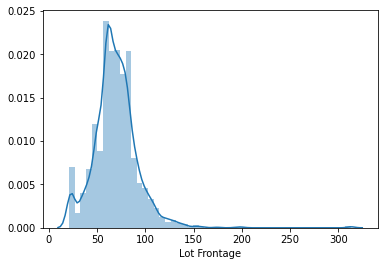

In [24]:
#We next move on to Lot Frontage, Garage Year Built and Masonry Veneer Area - the numerical columns to clean

#Let's see the distribution of this:

sns.distplot(train['Lot Frontage']);

#if it's pretty skewed right so I am better using the median rather than the mean for my imputating of missing rows

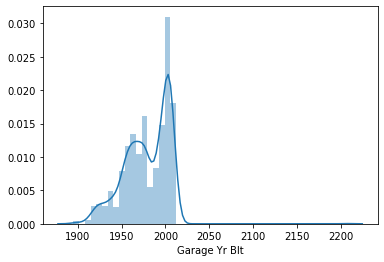

In [25]:
sns.distplot(train['Garage Yr Blt']);

#Garage Yr Blt is also very skewed mostly to the left but apparently we have incorrect outliers seemngly up to 2200
#so it's best to use median again

In [26]:
train['Garage Yr Blt'].sort_values(ascending=False).head(20)

#am going to take a wild guess that they they meant 2007 and not 2207, and amend accordingly

1699    2207.0
144     2010.0
1241    2010.0
589     2009.0
1796    2009.0
963     2009.0
1732    2009.0
1238    2009.0
625     2009.0
172     2009.0
637     2009.0
398     2009.0
19      2009.0
369     2009.0
70      2009.0
1671    2009.0
1741    2009.0
1060    2009.0
1700    2009.0
81      2009.0
Name: Garage Yr Blt, dtype: float64

In [27]:
train.at[1699, 'Garage Yr Blt']=2007

In [28]:
train['Garage Yr Blt'].tail(5)

2046    2007.0
2047    1961.0
2048    1929.0
2049    1956.0
2050    1999.0
Name: Garage Yr Blt, dtype: float64

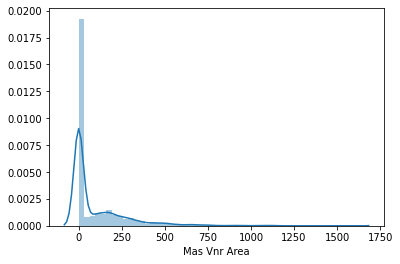

In [29]:
sns.distplot(train['Mas Vnr Area']);

#Garage Yr Blt is also very skewed mostly to the right again. also will use Median here.

In [30]:
to_median_columns = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']

In [31]:
train[to_median_columns]

,Lot Frontage,Garage Yr Blt,Mas Vnr Area
0,NaN,1976.0,289.0
1,43.0,1997.0,132.0
2,68.0,1953.0,0.0
3,73.0,2007.0,0.0
4,82.0,1957.0,0.0
...,...,...,...
2046,79.0,2007.0,0.0
2047,NaN,1961.0,0.0
2048,57.0,1929.0,0.0
2049,80.0,1956.0,0.0


In [32]:
#here is where I fill up the missing values with median to ensure the shape of distributions are about the same
#will write a for loop .fillna function for this

for column in to_median_columns:
    train[column].fillna(train[column].median(),inplace=True)

In [33]:
for column in to_median_columns:
    test[column].fillna(test[column].median(),inplace=True)

In [34]:
#let's see if function worked on both :
print((train[to_median_columns].isna().sum()))

print(test[to_median_columns].isna().sum())

#yes, let's see what we got left

Lot Frontage     0
Garage Yr Blt    0
Mas Vnr Area     0
dtype: int64
Lot Frontage     0
Garage Yr Blt    0
Mas Vnr Area     0
dtype: int64


In [35]:
test.isnull().sum().sort_values(ascending=False).head(20)

Garage Cond       45
Garage Finish     45
Garage Qual       45
Garage Type       44
BsmtFin Type 1    25
Bsmt Exposure     25
Bsmt Cond         25
Bsmt Qual         25
BsmtFin Type 2    25
Electrical         1
Mas Vnr Type       1
Roof Style         0
Roof Matl          0
Exterior 1st       0
Sale Type          0
Exterior 2nd       0
Year Built         0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
dtype: int64

In [36]:
train.isnull().sum().sort_values(ascending=False).head(20)

Garage Finish     114
Garage Cond       114
Garage Qual       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
BsmtFin Type 1     55
Bsmt Qual          55
Bsmt Cond          55
Mas Vnr Type       22
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
Exterior 1st        0
MS SubClass         0
dtype: int64

In [37]:
#in both dataframes the main null problem is Garage and Basements-related sub-columns. 
#start with masked Boolean viewing for observing nulls in Basement-related subcolumns to see how they may be related

train[train['Bsmt Qual'].isnull()][['Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1',
                        'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].head()

,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [38]:
train[train['Garage Type'].isnull()][['Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NaN,1980.0,NaN,0,0.0,NaN,NaN
53,NaN,1980.0,NaN,0,0.0,NaN,NaN
65,NaN,1980.0,NaN,0,0.0,NaN,NaN
79,NaN,1980.0,NaN,0,0.0,NaN,NaN
101,NaN,1980.0,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1991,NaN,1980.0,NaN,0,0.0,NaN,NaN
2010,NaN,1980.0,NaN,0,0.0,NaN,NaN
2027,NaN,1980.0,NaN,0,0.0,NaN,NaN
2039,NaN,1980.0,NaN,0,0.0,NaN,NaN


In [39]:
#so it seems from above that if there's no square feet total for the basement area, it means there's no basement.
#and if there is no Garage Area, there's obviously no sub-columns to observe.
#hence the null values. 

In [40]:
#this means we can fill up both our Garage and Basement non-numeric nominal/ordinal columns with NaNs 
#for consistency with a function

fill_with_NaN = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2', 'Garage Type',
                 'Garage Finish','Garage Qual','Garage Cond']


for col in fill_with_NaN:
    test[col].fillna('None',inplace=True)
    train[col].fillna('None',inplace=True)

In [41]:
#check sum of Nulls sorted by Column Name in both sets
print("Test Nulls")
print()
print(test.isnull().sum().sort_values(ascending=False).head(20))

print()

print("Train Nulls")
print()
print(train.isnull().sum().sort_values(ascending=False).head(20))

Test Nulls

Electrical        1
Mas Vnr Type      1
Sale Type         0
Exter Cond        0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Area      0
Exter Qual        0
Foundation        0
Bsmt Unf SF       0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
Year Remod/Add    0
Year Built        0
dtype: int64

Train Nulls

Mas Vnr Type      22
Bsmt Full Bath     2
Bsmt Half Bath     2
Total Bsmt SF      1
Garage Area        1
Bsmt Unf SF        1
BsmtFin SF 1       1
Garage Cars        1
BsmtFin SF 2       1
Utilities          0
Lot Config         0
MS SubClass        0
MS Zoning          0
BsmtFin Type 1     0
Bsmt Exposure      0
Bsmt Cond          0
Bsmt Qual          0
Foundation         0
Exter Cond         0
Exter Qual         0
dtype: int64


In [42]:
#we just have a handful of null values left. let's attack Train Masonry Veneer Type:

train['Mas Vnr Type'].fillna('None', inplace=True)
test['Mas Vnr Type'].fillna('None', inplace=True)

In [43]:
#Electrical only has one error left in Test so let's just fill that with whatever is the mode

train['Electrical'].mode()



0    SBrkr
dtype: object

In [44]:
#SBrkr that refers to a Standard Circuit Breaker according to a dictionary. we'll just fill the only test null with that 

test['Electrical'].fillna('SBrkr', inplace=True)

In [45]:
#no more nulls in test.
test.isna().sum().sum()

0

In [46]:
train.isna().sum().sum()

#just a bit more for train to clean

10

In [47]:
#we already saw what our final null cols were in the train set. Let's list them:

final_null_cols=['Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 1',
                 'Garage Cars', 'BsmtFin SF 2']

In [48]:
(train[final_null_cols]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Full Bath  2049 non-null   float64
 1   Bsmt Half Bath  2049 non-null   float64
 2   Total Bsmt SF   2050 non-null   float64
 3   Garage Area     2050 non-null   float64
 4   Bsmt Unf SF     2050 non-null   float64
 5   BsmtFin SF 1    2050 non-null   float64
 6   Garage Cars     2050 non-null   object 
 7   BsmtFin SF 2    2050 non-null   float64
dtypes: float64(7), object(1)
memory usage: 128.3+ KB


In [49]:
#Except for Garage Cars, the rest are just floats. I'll impute the null in Garage Cars with the mode value

train['Garage Cars'].mode()

0    2
dtype: object

In [50]:
train['Garage Cars'].fillna(2, inplace=True)

In [51]:
#as for all the other float columns with nulls, we will just go with median and impute that in after amending our col list

final_null_cols2=['Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 1', 
                  'BsmtFin SF 2']

for col in final_null_cols2:
    train[col] = train[col].fillna(train[col].median())

In [52]:
train.isna().sum().sum()

#finally, no nulls in either train or test

0

In [53]:
test.isna().sum().sum()

0

In [54]:
#check sum of Nulls sorted by Column Name in both sets
print("Test Nulls")
print()
print(test.isnull().sum().sort_values(ascending=False).head(81))

print()

print("Train Nulls")
print()
print(train.isnull().sum().sort_values(ascending=False).head(81))

Test Nulls

Sale Type        0
Year Built       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
Bedroom AbvGr    0
Kitchen AbvGr    0
Kitchen Qual     0
TotRms AbvGrd    0
PID              0
Length: 75, dtype: int64

Train Nulls

SalePrice        0
Exter Cond       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
Kitchen AbvGr    0
Kitchen Qual     0
TotRms AbvGrd    0
Functional       0
PID              0
Length: 76, dtype: int64


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              879 non-null    int64  
 1   MS SubClass      879 non-null    object 
 2   MS Zoning        879 non-null    object 
 3   Lot Frontage     879 non-null    float64
 4   Lot Area         879 non-null    int64  
 5   Street           879 non-null    object 
 6   Lot Shape        879 non-null    object 
 7   Land Contour     879 non-null    object 
 8   Utilities        879 non-null    object 
 9   Lot Config       879 non-null    object 
 10  Land Slope       879 non-null    object 
 11  Neighborhood     879 non-null    object 
 12  Condition 1      879 non-null    object 
 13  Condition 2      879 non-null    object 
 14  Bldg Type        879 non-null    object 
 15  House Style      879 non-null    object 
 16  Overall Qual     879 non-null    object 
 17  Overall Cond    

In [56]:
train.to_csv('./datasets/train_clean.csv')

In [57]:
train_clean = pd.read_csv('./datasets/train_clean.csv')

In [58]:
train_clean.isna().sum().sum()

#checking that our new train csv is truly clean

0

In [59]:
test.to_csv('./datasets/test_clean.csv')

In [60]:
test_clean = pd.read_csv('./datasets/test_clean.csv')

In [61]:
test_clean.isna().sum().sum()

#checking that our new test csv is truly clean

0

### Now Moving Onto:
## 2. EDA and Preprocessing